In [1]:
import os
import requests
import base64
import json
from cached_property import cached_property

In [2]:
s = requests.Session()

In [10]:
class Meijer(object):
    # From Meijer_v5.20.1_apkpure.com/res/values/strings.xml
    account_services_client_id = "mma"
    account_services_secret = "drAqas76Re7RekeBanaMaNEMah7paDE5"
    # Token string, decoded
    token_decoded = f"{account_services_client_id}:{account_services_secret}".encode("UTF-8")
    # Token string, encoded
    basic_token = base64.encodebytes(token_decoded).decode("UTF-8").strip()
    
    def __init__(self, user: str, password: str):
        """Meijer: Use the Meijer App, programatically, in Python.
        
        user: username/e-mail address for mperks
        pass: password.
        """
        self.user = user
        self.password = password
        
        # This is set on login.
        self.bearer_token = None
        
        # Create a requests session.
        self.session = requests.Session()
        # Login
        self.login()
        
        
    def login(self):
        request=dict()
        request["url"] = "https://login.meijer.com/as/token.oauth2"
        request["headers"] = {
            'Authorization': f"Basic {self.basic_token}",
            'Platform': 'Android',
            'Version': '5.20.1',
            'Build': '52001000',
            'Content-Type': 'application/x-www-form-urlencoded',
            'Connection': "Keep-Alive",
            'Accept-Encoding': 'gzip',
            'User-Agent': 'okhttp/3.8.0'
        }
        request["params"] =  {
            'grant_type': 'password',
            'scope': 'openid',
            "username": self.user,
            "password": self.password
        }
        r = self.session.post(**request)
        self.r_ = r # debugs
        assert r.status_code==200
        
        for key, value in r.json().items():
            setattr(self, key, value)
            
        _, meijer_id64, _ = self.access_token.split(".")
        ids = json.loads(base64.decodebytes(f"{meijer_id64}=".encode()))
        for key, value in ids.items():
            setattr(self, key, value)
            
        self.bearer_token = f'{self.token_type} {self.access_token}'

    @cached_property
    def coupons(self):
        # Coupons
        request=dict()
        request["url"] = "https://mperksservices.meijer.com/dgtlmPerksMMA/api/offers"
        request["headers"] = {
            'Accept': "application/vnd.meijer.digitalmperks.offers-v1.0+json",
            'Authorization': self.bearer_token,
            'Platform': 'Android',
            'Version': '5.20.1',
            'Build': '52001000',
            'Content-Type': 'application/vnd.meijer.digitalmperks.offers-v1.0+json',
            'Connection': "Keep-Alive",
            'Accept-Encoding': 'gzip',
            'User-Agent': 'okhttp/3.8.0'
        }
        request["json"] = json.loads('{"categoryId":"","ceilingCount":0,"ceilingDuration":0,"currentPage":1,"displayReasonFilters":[],"getOfferCountPerDepartment":true,"offerClass":1,"offerIds":[],"pageSize":9999,"rewardCouponId":0,"searchCriteria":"","showClippedCoupons":false,"showOnlySpecialOffers":false,"showRedeemedOffers":false,"sortType":"BySuggested","storeId":52,"tagId":"","upcList":[],"zip":""}')
        r = self.session.post(**request)
        self.r_ = r
        assert r.status_code == 200
        return r.json()['listOfCoupons']
    
    def clip(self, coupon):
        if isinstance(coupon, dict):
            meijerOfferId = coupon["meijerOfferId"]
        elif isinstance(coupon, [str, int]):
            meijerOfferId = coupon
        
        request["url"] = "https://mperksservices.meijer.com/dgtlmPerksMMA/api/offers/Clip"
        request["headers"] = {
            'Accept': "application/vnd.meijer.digitalmperks.clip-v1.0+json",
            'Authorization': self.bearer_token,
            'Platform': 'Android',
            'Version': '5.20.1',
            'Build': '52001000',
            'Content-Type': 'application/vnd.meijer.digitalmperks.clip-v1.0+json',
            'Connection': "Keep-Alive",
            'Accept-Encoding': 'gzip',
            'User-Agent': 'okhttp/3.8.0'
        }
        request["json"] = {
            "meijerOfferId": meijerOfferId
        }
        r = self.session.post(**request)
        self.r_ = r
        assert r.status_code == 200
        
    @cached_property
    def stores(self):
        request=dict()
        request["url"] = "https://mservices.meijer.com/storeinfo/api/mobile/near"
        request["headers"] = {
            'Version': "7",
            'Authorization': self.bearer_token,
            'Connection': "Keep-Alive",
            'Accept-Encoding': 'gzip',
            'User-Agent': 'okhttp/3.8.0'
        }
        latitude, longitude=43.016570, -85.726290
        request["params"] =  {
            'latitude': latitude,
            'longitude': longitude,
            'miles': '10000',
            'numToReturn': '10000',
        }
        r = self.session.get(**request)
        self.r_ = r
        assert r.status_code == 200
        return r.json()["store"]
        

    def __repr__(self):
        return "Meijer<>"

with open(os.path.expanduser("~/.ssh/meijer5"), "r") as fid:
    meijer_email, meijer_pass,  = [n.strip() for n in fid.readlines()[0:2]]

m = Meijer(meijer_email, meijer_pass)
self = m

In [6]:
r = m.session.get("https://static.meijer.com/mobileassets/shopandscan/shopandscan_config.json")
r

<Response [200]>

{'currentLibraryVersionIOS': {'major': 3, 'minor': 0, 'patch': 0},
 'currentLibraryVersionAndroid': {'major': 2, 'minor': 0, 'patch': 0}}

In [9]:
import uuid

In [34]:
cart_uuid = uuid.uuid4()
request=dict()
request["url"] = "https://mservices.meijer.com/dgtlmma/accounts/isShopAndScanEnabled"
request["headers"] = {
    'Accept': "application/vnd.meijer.account.shopAndScanEnabled-v1.0+json",
    'Authorization': self.bearer_token,
    'Version': "3.6.0",
    "Build": "36000",
    'Platform': "Android",
    'Content-Type': "application/vnd.meijer.account.shopAndScanUserInfo-v1.0+json",
    'Connection': "Keep-Alive",
    'Accept-Encoding': 'gzip',
    'User-Agent': 'okhttp/3.8.0'
}
latitude, longitude=43.016570, -85.726290
request["json"] =  {
    'guid': str(cart_uuid)
}
r = self.session.post(**request)
self.r_ = r
assert r.status_code == 200
assert r.text == 'true'

In [32]:
base64.decodebytes(b"c2VsZnNjYW46Z2FkZWYmc0BuVVQ1dXQz=")

b'selfscan:gadef&s@nUT5ut3'

In [ ]:
99999266667395237671

In [63]:
fuel_stores = list()
for store in m.stores:
    if store["FuelPrices"] is None:
        continue
    for fuel in store["FuelPrices"]:
        store[fuel["FuelType"].split("-")[1]]=fuel["FuelPrice"]
        store[fuel["FuelType"]+"_time"]=fuel["PriceEffectiveDate"]
    for f in ["AuxUnitInfo", "GasStationAmenities", "GasStationHours"]:
        try:
            store.pop(f)
        except:
            pass
    fuel_stores.append(store)
    len(store["FuelPrices"])

In [65]:
import pandas as pd

In [66]:
df = pd.DataFrame(fuel_stores)

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

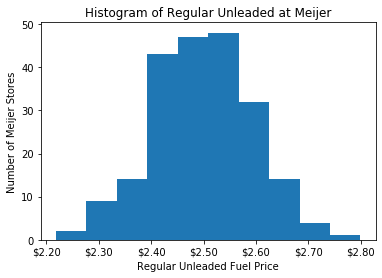

In [82]:
ax = df["Regular Unleaded"].plot(kind='hist', bins=10)
plt.title("Histogram of Regular Unleaded at Meijer")
plt.xlabel("Regular Unleaded Fuel Price")
plt.ylabel("Number of Meijer Stores")
fmt = '${x:,.2f}'
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick)